In [4]:
from keras.utils import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Specify the path to your image dataset
dataset_training_path = "/home/layth/git/mri_analysis/archive/Training/"
dataset_testing_path = "/home/layth/git/mri_analysis/archive/Testing/"

dataset_training_path = "/Users/studentuser/WORKING_BASE/mri_analysis/archive/Training"
dataset_testing_path = "/Users/studentuser/WORKING_BASE/mri_analysis/archive/Testing"

RESIZE = 150
FLAT = RESIZE * RESIZE * 3
classes = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pitutary_tumor'}

In [12]:
# image_size: resizes the images
# batch_size: how many images at a time
# subset: allows me to return a tuple (train_data, val_data)
train_data = image_dataset_from_directory(directory=dataset_training_path,
                                          image_size=(RESIZE, RESIZE),
                                          batch_size=32,
                                          color_mode='rgb',
                                          seed=42)

testing_data = image_dataset_from_directory(directory=dataset_testing_path,
                                          image_size=(RESIZE, RESIZE),
                                          batch_size=32,
                                          color_mode='rgb',
                                          seed=42)


X_train = []
y_train = []
X_test = []
y_test = []

# train_data yields batches. I am 'melting' 
# all batches together in one big array
for images, labels in train_data:
  X_train.extend(images.numpy())
  y_train.extend(labels.numpy())
  
for images, labels in testing_data:
  X_test.extend(images.numpy())
  y_test.extend(labels.numpy())

X_train = np.array(X_train) # convert X_train to numpy array
X_train = np.divide(X_train, 255) # rescale pixels
X_train_flat = X_train.reshape(np.shape(X_train)[0], -1, np.shape(X_train)[-1]) # flatten
y_train = np.array(y_train)

X_test = np.array(X_test) # convert X_val to numpy array
X_test = np.divide(X_test, 255) # rescale pixels
X_test_flat = X_test.reshape(np.shape(X_test)[0], -1, np.shape(X_test)[-1]) # flatten
y_test = np.array(y_test)

print()
print(f"Flattening after resize: {RESIZE} * {RESIZE} * 3 = {FLAT}")
print(f"Shape of X_train: {np.shape(X_train)}")
print(f"Shape of X_train_flat: {np.shape(X_train_flat)}")
print(f"Shape of y_train: {np.shape(y_train)}")
print(f"Shape of X_test: {np.shape(X_test)}")
print(f"Shape of X_test_flat: {np.shape(X_test_flat)}")
print(f"Shape of y_val: {np.shape(y_test)}")

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.

Flattening after resize: 150 * 150 * 3 = 67500
Shape of X_train: (2870, 150, 150, 3)
Shape of X_train_flat: (2870, 22500, 3)
Shape of y_train: (2870,)
Shape of X_test: (394, 150, 150, 3)
Shape of X_test_flat: (394, 22500, 3)
Shape of y_val: (394,)


In [44]:
tr_unique_classes, tr_counts = np.unique(y_train, return_counts=True)
te_unique_classes, te_counts = np.unique(y_test, return_counts=True)

In [55]:
for c in tr_unique_classes:
    print(f"{classes[c]:>16}: {tr_counts[c]} images")
print(f"           Total: {np.sum(tr_counts)} images")
print("---------------------------------")
for c in te_unique_classes:
    print(f"{classes[c]:>16}: {te_counts[c]} images")
print(f"           Total: {np.sum(te_counts)} images")

    glioma_tumor: 826 images
meningioma_tumor: 822 images
        no_tumor: 395 images
  pitutary_tumor: 827 images
           Total: 2870 images
---------------------------------
    glioma_tumor: 100 images
meningioma_tumor: 115 images
        no_tumor: 105 images
  pitutary_tumor: 74 images
           Total: 394 images


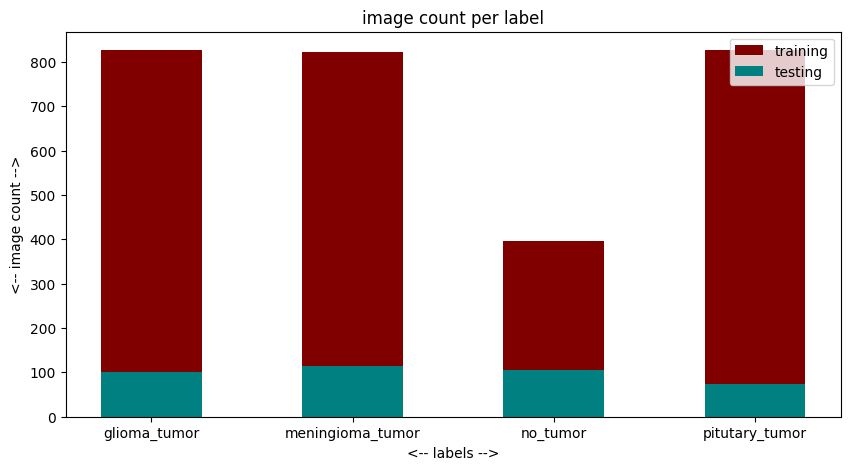

In [65]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(classes.values(), tr_counts, color='maroon', width=.5, label="training") # train data
plt.bar(classes.values(), te_counts, color='teal', width=.5, label="testing") # test data

plt.xlabel("<-- labels -->")
plt.ylabel("<-- image count -->")
plt.title("image count per label")

plt.legend()
plt.show()